<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/numerical_numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Restaurant bills

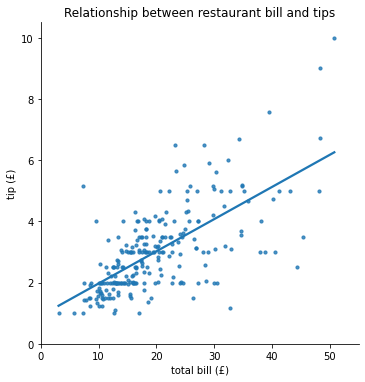

In [3]:
tips = sns.load_dataset('tips')
g = sns.lmplot(x='total_bill', y='tip', data=tips, scatter_kws={"s": 10},
               ci=None)
g.axes[0, 0].set_xlabel('total bill (£)')
g.axes[0, 0].set_ylabel('tip (£)')
g.axes[0, 0].set_title('Relationship between restaurant bill and tips')
g.axes[0, 0].set_xlim(0, 55)
g.axes[0, 0].set_ylim(0, 10.5)
plt.show()

## Correlation

In [4]:
# First generate some data.
np.random.seed(3)                 # Set random seed for reproducibility.
n = 30                            # Number of data points to sample.
mean = 10                         # Mean of random sample.
sd = 4                            # Standard deviation of random sample.
x = np.random.normal(mean, sd, n) # Sample from normal distribution.
noise = np.random.normal(0, 4, n) # Sample some noise for non-perfect correlation.
df = pd.DataFrame({'x': x,
                   'perfect_pos': x,
                   'perfect_neg': np.max(x) - x,
                   'none': np.random.normal(mean, sd, n),
                   'positive': x + noise,
                   'negative': np.max(x) - x + noise})
df.round(1).head()

,x,perfect_pos,perfect_neg,none,positive,negative
0,17.2,17.2,0.0,14.2,20.1,3.0
1,11.7,11.7,5.4,15.3,19.7,13.3
2,10.4,10.4,6.8,9.2,5.4,1.8
3,2.5,2.5,14.6,17.1,0.0,12.1
4,8.9,8.9,8.3,7.3,5.7,5.0


### Matplotlib version

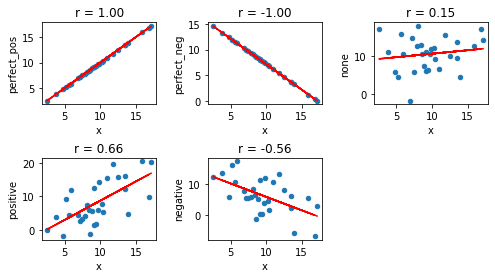

In [5]:
# Create a figure object of size 8x4 inches, and an array of axes
# objects. The shape of the axes array is (2, 3): 2 rows, 3 columns.
fig, axes = plt.subplots(2, 3, figsize=(8, 4))
# Convert axes to 1D array.
axes = axes.ravel()
# Loop over columns and draw on separate axes.
for var, i in zip(df.columns[1:], range(0, 6)):
    df.plot.scatter('x', var, ax=axes[i])
    # Compute regression line.
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, df[var])
    axes[i].plot(x, slope * x + intercept, 'r')
    axes[i].set_title('r = {:0.2f}'.format(r_value))
# Delete unused (last) axes.
fig.delaxes(axes[-1])
# Increase the space between subplots.
fig.subplots_adjust(wspace=0.45, hspace=0.65)
plt.show()

### Seaborn version

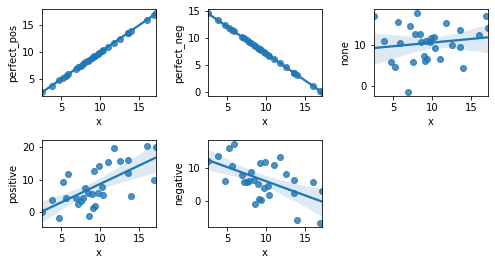

In [6]:
# Create a figure object of size 9x6 inches, and an array of axes
# objects. The shape of the axes array is (2, 3): 2 rows, 3 columns.
fig, axes = plt.subplots(2, 3, figsize=(8, 4))

sns.regplot(x='x', y='perfect_pos', data=df, ax=axes[0, 0])
sns.regplot(x='x', y='perfect_neg', data=df, ax=axes[0, 1])
sns.regplot(x='x', y='none', data=df, ax=axes[0, 2])
sns.regplot(x='x', y='positive', data=df, ax=axes[1, 0])
sns.regplot(x='x', y='negative', data=df, ax=axes[1, 1])

# Delete unused axes.
fig.delaxes(axes[1, 2])
# Increase the space between subplots.
fig.subplots_adjust(wspace=0.45, hspace=0.5)

plt.show()

## Scatterplot matrices

### Pandas.plotting

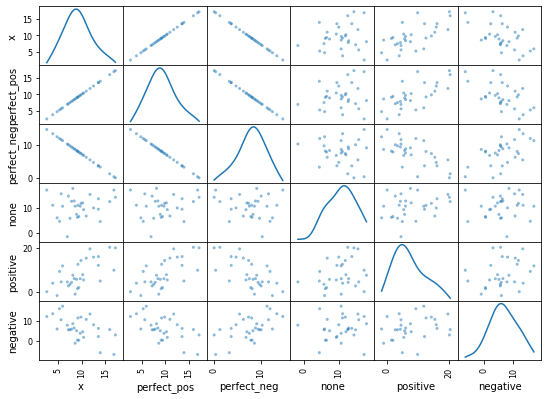

In [7]:
axes = pd.plotting.scatter_matrix(df, alpha=0.5, diagonal='kde',
                                  figsize=(9, 6.5), range_padding=0.22)
plt.show()

### Seaborn

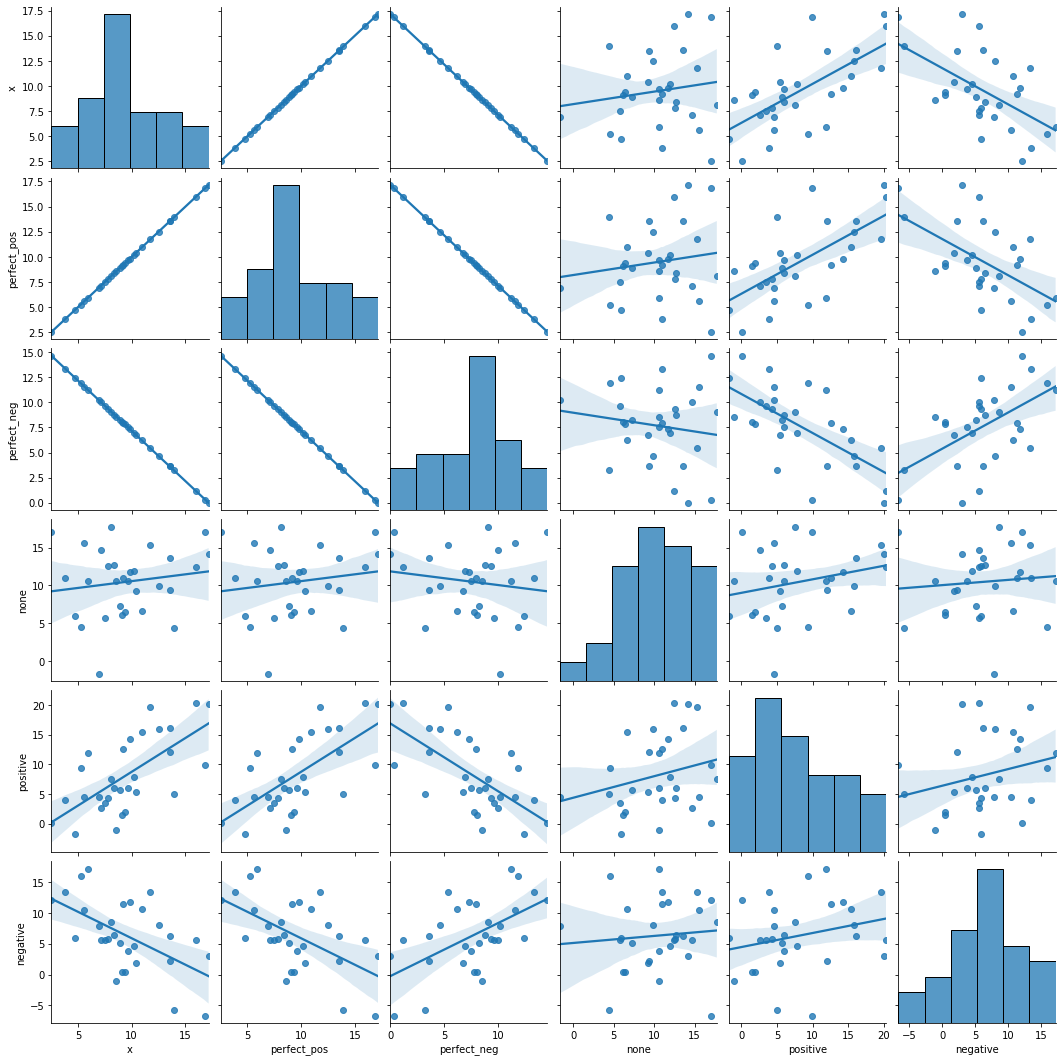

In [8]:
sns.pairplot(df, kind='reg')
plt.show()